In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_excel('plan.xlsx')
print(df)

     Task Department      Start        End  Completion
0   TSK M         IT 2022-03-17 2022-03-20         0.0
1   TSK N        MKT 2022-03-17 2022-03-19         0.0
2   TSK L        ENG 2022-03-10 2022-03-13         0.0
3   TSK K       PROD 2022-03-09 2022-03-13         0.0
4   TSK J       PROD 2022-03-04 2022-03-17         0.0
5   TSK I        FIN 2022-02-28 2022-03-02         1.0
6   TSK H        MKT 2022-02-28 2022-03-05         0.4
7   TSK G        FIN 2022-02-27 2022-03-03         0.7
8   TSK F        MKT 2022-02-26 2022-02-27         1.0
9   TSK E        ENG 2022-02-23 2022-03-09         0.5
10  TSK D        FIN 2022-02-22 2022-03-01         1.0
11  TSK C         IT 2022-02-21 2022-03-03         0.9
12  TSK B        MKT 2022-02-19 2022-02-24         1.0
13  TSK A        MKT 2022-02-15 2022-02-20         1.0


In [14]:
# project start date
proj_start = df.Start.min()
# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days
# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days
# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

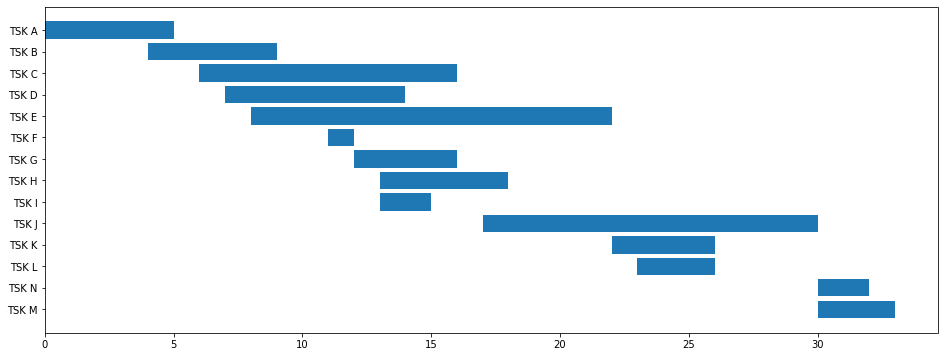

In [15]:
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num)
plt.show()

In [16]:
# create a column with the color for each department
def color(row):
    c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
    return c_dict[row['Department']]
df['color'] = df.apply(color, axis=1)

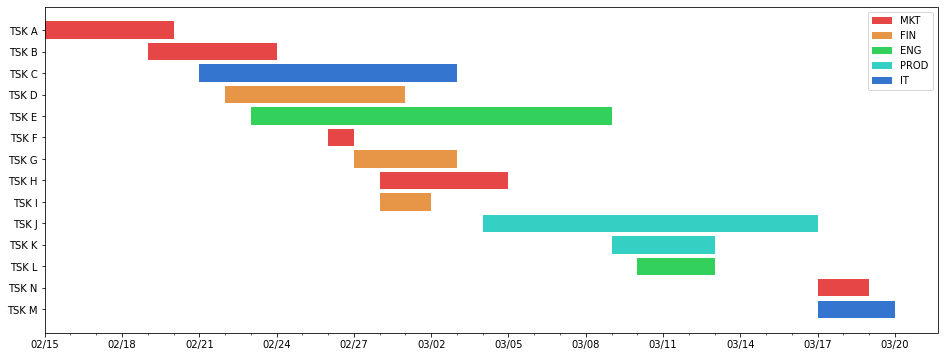

In [17]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color)
##### LEGENDS #####
c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C',
          'PROD':'#34D0C3', 'IT':'#3475D0'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
plt.show()

In [18]:
# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

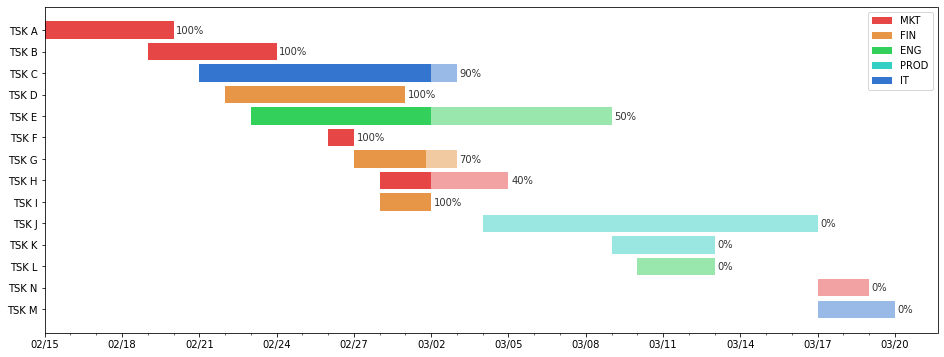

In [19]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(1, figsize=(16,6))
# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)
# texts
for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, 
            f"{int(row.Completion*100)}%", 
            va='center', alpha=0.8)
##### LEGENDS #####
c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
plt.show()